In [1]:
# notebooks/eda.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../scripts")
from read_from_rds import read_data

# Read data from RDS MySQL
df = read_data()

# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Check column names
print("Columns:", df.columns)

# Check data types
print("Data types:\n", df.dtypes)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

c:\Users\ASUS\Lasitha\MSC Data Science\Principles of DS\Assignments\Portfolio-Q2\notebooks\../scripts\read_from_rds.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Shape of the dataset: (980, 6)
Columns: Index(['id', 'Title', 'Price', 'Rating', 'Availability', 'Category'], dtype='object')
Data types:
 id                int64
Title            object
Price           float64
Rating           object
Availability     object
Category         object
dtype: object
Missing values:
 id              0
Title           0
Price           0
Rating          0
Availability    0
Category        0
dtype: int64


In [2]:
# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

# Remove duplicates (if necessary)
df = df.drop_duplicates()

Number of duplicates: 0


In [3]:
# Drop rows with missing values (if necessary)-
df = df.dropna()

In [4]:
# Summary statistics for numerical columns
print(df['Price'].describe())

count    980.000000
mean      35.026898
std       14.498154
min       10.000000
25%       22.045000
50%       35.940000
75%       47.535000
max       59.990000
Name: Price, dtype: float64


In [6]:
# Count of books by rating
print(df['Rating'].value_counts())

Rating
One      82
Two      79
Three    75
Five     75
Four     69
Name: count, dtype: int64


In [7]:
# Count of books by availability
print(df['Availability'].value_counts())

Availability
In stock    380
Name: count, dtype: int64


In [8]:
# Count of books by category
print(df['Category'].value_counts())

Category
Default               60
Nonfiction            43
Sequential Art        38
Fiction               27
Add a comment         23
Young Adult           21
Fantasy               18
Food and Drink        14
Mystery               13
Romance               11
Poetry                11
Childrens             10
History                8
Historical Fiction     8
Thriller               6
Business               6
Horror                 6
Science Fiction        5
Music                  4
Science                4
Humor                  4
Religion               3
Self Help              3
Philosophy             3
Spirituality           3
Travel                 3
New Adult              3
Contemporary           2
Health                 2
Art                    2
Christian              2
Politics               2
Christian Fiction      2
Psychology             2
Womens Fiction         2
Cultural               1
Autobiography          1
Erotica                1
Biography              1
Crime           

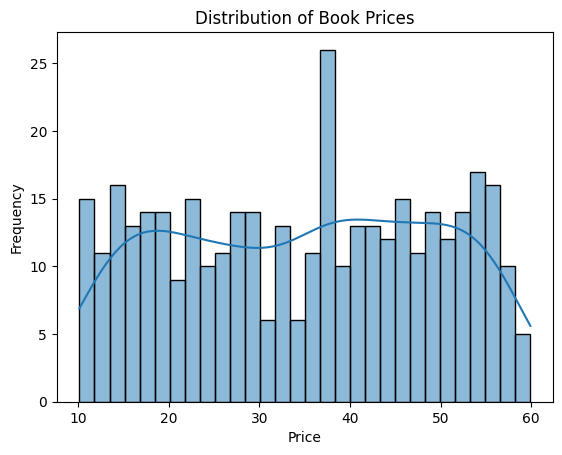

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of book prices
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

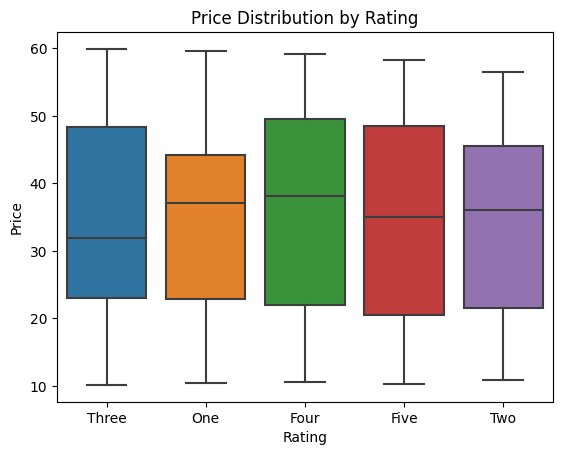

In [10]:
# Boxplot of price by rating
sns.boxplot(x='Rating', y='Price', data=df)
plt.title('Price Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

In [11]:
# Average price by category
print(df.groupby('Category')['Price'].mean().sort_values(ascending=False))

# Average rating by category
print(df.groupby('Category')['Rating'].value_counts())

Category
Politics              51.990000
Health                51.560000
Christian             50.860000
Self Help             48.176667
New Adult             48.070000
Travel                47.823333
Art                   46.615000
Science               45.652500
Contemporary          42.280000
Fantasy               38.713333
Historical Fiction    37.578750
Poetry                36.961818
Music                 36.905000
Cultural              36.580000
Young Adult           36.308095
Fiction               35.708148
Womens Fiction        35.610000
Default               35.461667
Childrens             35.005000
Christian Fiction     34.965000
Mystery               34.233077
Sequential Art        34.195263
Add a comment         33.895652
Food and Drink        33.661429
Nonfiction            32.836977
History               32.060000
Thriller              30.925000
Science Fiction       30.666000
Philosophy            30.496667
Religion              29.956667
Business              29.913333

In [12]:
# Average price by availability
print(df.groupby('Availability')['Price'].mean())

# Average rating by availability
print(df.groupby('Availability')['Rating'].value_counts())

Availability
In stock    34.782605
Name: Price, dtype: float64
Availability  Rating
In stock      One       82
              Two       79
              Five      75
              Three     75
              Four      69
Name: count, dtype: int64


               Price  Rating_num
Price       1.000000    0.018718
Rating_num  0.018718    1.000000


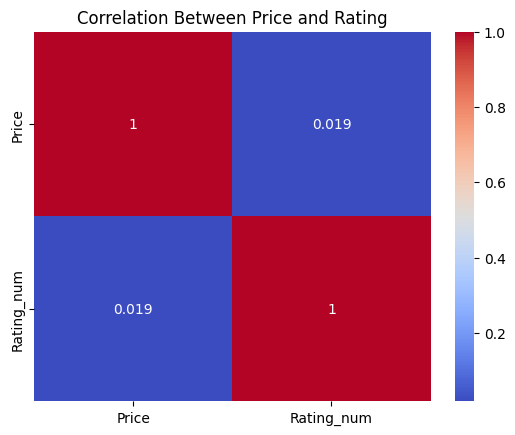

In [13]:
# Convert rating to numerical values (if necessary)
rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['Rating_num'] = df['Rating'].map(rating_map)

# Correlation matrix
corr = df[['Price', 'Rating_num']].corr()
print(corr)

# Heatmap of correlations
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Price and Rating')
plt.show()

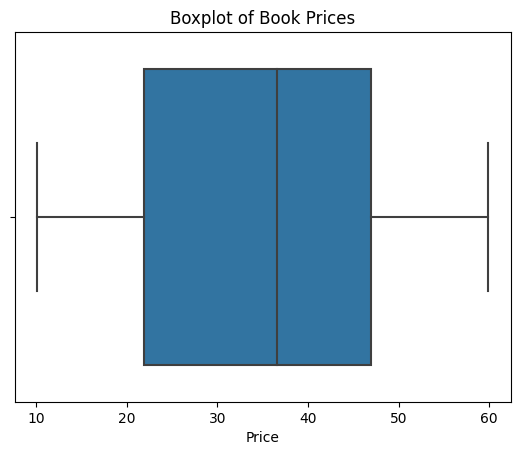

In [14]:
# Boxplot for price
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Book Prices')
plt.show()